<a href="https://colab.research.google.com/github/ertomz/h4bl-superfund-website/blob/main/Census_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving 2county2019.xlsx to 2county2019 (1).xlsx


In [ ]:
#reading the file
census = pd.read_excel('2county2019.xlsx')
census.head(5)

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER
0,1,1,Alabama,Autauga County,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974
1,1,3,Alabama,Baldwin County,12,0,223234,108247,114987,10346,11008,1818,1785,9.565747,9.557771,9.573256,FEM,1.614001,1.679492,1.552349
2,1,5,Alabama,Barbour County,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503
3,1,7,Alabama,Bibb County,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122
4,1,9,Alabama,Blount County,12,0,57826,28472,29354,658,618,400,420,2.206620,2.311042,2.105335,MALE,1.418047,1.404889,1.430810


In [ ]:
#fixing the names
census['CTYNAME']=census['CTYNAME'].str.replace('County', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Parish', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Census Area', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('Municipality', '')
census['CTYNAME']=census['CTYNAME'].str.replace('City and Burough', '')
census['CTYNAME']=census['CTYNAME'].str.replace('city', '')

#census['CTYNAME']=census['CTYNAME'].str.split(' ',expand=True)[0:-1].str[:-1]

census['CTYNAME']=census['CTYNAME'].str.strip(' ')
census.head(5)

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER
0,1,1,Alabama,Autauga,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974
1,1,3,Alabama,Baldwin,12,0,223234,108247,114987,10346,11008,1818,1785,9.565747,9.557771,9.573256,FEM,1.614001,1.679492,1.552349
2,1,5,Alabama,Barbour,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503
3,1,7,Alabama,Bibb,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122
4,1,9,Alabama,Blount,12,0,57826,28472,29354,658,618,400,420,2.206620,2.311042,2.105335,MALE,1.418047,1.404889,1.430810


In [ ]:
census['CountyState']= census['CTYNAME'].str.cat(census['STNAME'], sep =", ") 
census

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER,CountyState
0,1,1,Alabama,Autauga,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974,"Autauga, Alabama"
1,1,3,Alabama,Baldwin,12,0,223234,108247,114987,10346,11008,1818,1785,9.565747,9.557771,9.573256,FEM,1.614001,1.679492,1.552349,"Baldwin, Alabama"
2,1,5,Alabama,Barbour,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503,"Barbour, Alabama"
3,1,7,Alabama,Bibb,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122,"Bibb, Alabama"
4,1,9,Alabama,Blount,12,0,57826,28472,29354,658,618,400,420,2.206620,2.311042,2.105335,MALE,1.418047,1.404889,1.430810,"Blount, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56,37,Wyoming,Sweetwater,12,0,42343,21808,20535,481,389,557,499,2.054649,2.205613,1.894327,MALE,2.493919,2.554109,2.429998,"Sweetwater, Wyoming"
3138,56,39,Wyoming,Teton,12,0,23464,12142,11322,147,110,204,170,1.095295,1.210674,0.971560,MALE,1.593931,1.680119,1.501502,"Teton, Wyoming"
3139,56,41,Wyoming,Uinta,12,0,20226,10224,10002,122,111,256,245,1.151983,1.193271,1.109778,MALE,2.477010,2.503912,2.449510,"Uinta, Wyoming"
3140,56,43,Wyoming,Washakie,12,0,7805,3963,3842,55,38,106,123,1.191544,1.387837,0.989068,MALE,2.934017,2.674741,3.201458,"Washakie, Wyoming"


In [ ]:
#percentage of counties with >50% male or >50% female
fem_census = census['BFEM?'].value_counts("FEM")
fem_census

MALE    0.700191
FEM     0.299809
Name: BFEM?, dtype: float64

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving superfunds.csv to superfunds (1).csv


In [ ]:
#superfund data
superfunds = pd.read_csv("superfunds.csv")
superfunds.head(5)

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
0,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06
1,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06
2,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06
3,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06
4,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06


In [ ]:
active = superfunds[superfunds["Status"] == "NPL Site"].shape
proposed = superfunds[superfunds["Status"] == "Deleted NPL Site"].shape
deleted = superfunds[superfunds["Status"] == "Proposed NPL Site"].shape

(active, proposed, deleted)

((1259, 32), (404, 32), (47, 32))

In [ ]:
superfunds['CountyState']= superfunds['County'].str.cat(superfunds['State'], sep =", ") 
superfunds.head(5)

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y,CountyState
0,Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06,"New Castle, Delaware"
1,Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06,"New Castle, Delaware"
2,Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06,"New Castle, Delaware"
3,"Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06,"New Castle, Delaware"
4,New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06,"New Castle, Delaware"


In [ ]:
superfunds_series = superfunds.set_index('CountyState').squeeze()
superfunds_series.head(5) 

,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"New Castle, Delaware",Army Creek Landfill,69.92,DED980494496,300086,3,Delaware,New Castle County,New Castle,NPL Site,39.653061,-75.608331,12/30/1982,09/08/1983,04/29/1994,236,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,13,-8.416681e+06,4.815653e+06
"New Castle, Delaware",Delaware Sand & Gravel Landfill,46.60,DED000605972,300034,3,Delaware,New Castle County,New Castle,NPL Site,39.651389,-75.602781,12/30/1982,09/08/1983,08/12/1997,445,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,14,-8.416063e+06,4.815412e+06
"New Castle, Delaware",Delaware City PVC Plant,30.55,DED980551667,300091,3,Delaware,Delaware City,New Castle,NPL Site,39.586111,-75.649439,12/30/1982,09/08/1983,09/26/2001,787,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,15,-8.421257e+06,4.805978e+06
"New Castle, Delaware","Harvey & Knott Drum, Inc.",30.77,DED980713093,300123,3,Delaware,Kirkwood,New Castle,NPL Site,39.573331,-75.770839,12/30/1982,09/08/1983,06/22/1994,238,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,16,-8.434771e+06,4.804132e+06
"New Castle, Delaware",New Castle Steel,30.40,DED980705255,300106,3,Delaware,New Castle County,New Castle,Deleted NPL Site,39.657781,-75.577769,12/30/1982,09/08/1983,08/17/1988,30,09/22/1988,03/17/1989,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,17,-8.413279e+06,4.816336e+06


In [ ]:
census_nodrop = census

In [ ]:
#counties with >13% black population
black_census = census[census["BAC_PER"] > 13]
black_census

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER,CountyState
0,1,1,Alabama,Autauga,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974,"Autauga, Alabama"
2,1,5,Alabama,Barbour,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503,"Barbour, Alabama"
3,1,7,Alabama,Bibb,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122,"Bibb, Alabama"
5,1,11,Alabama,Bullock,12,0,10101,5508,4593,3753,3418,72,67,70.992971,68.137255,74.417592,FEM,1.376101,1.307190,1.458742,"Bullock, Alabama"
6,1,13,Alabama,Butler,12,0,19448,9024,10424,3941,4924,77,86,45.583093,43.672429,47.237145,FEM,0.838132,0.853280,0.825019,"Butler, Alabama"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,51,820,Virginia,Waynesboro,12,0,22630,10842,11788,1708,1915,139,164,16.009722,15.753551,16.245334,FEM,1.338931,1.282051,1.391245,"Waynesboro, Virginia"
2951,51,830,Virginia,Williamsburg,12,0,14954,6881,8073,1170,1447,103,107,17.500334,17.003343,17.923944,FEM,1.404307,1.496875,1.325406,"Williamsburg, Virginia"
2952,51,840,Virginia,Winchester,12,0,28078,13812,14266,1986,1893,214,235,13.815087,14.378801,13.269312,MALE,1.599117,1.549377,1.647273,"Winchester, Virginia"
3087,55,79,Wisconsin,Milwaukee,12,0,945726,457789,487937,127611,148153,8169,9043,29.158974,27.875506,30.363141,FEM,1.819977,1.784447,1.853313,"Milwaukee, Wisconsin"


In [ ]:
#number of counties with >50% male or >50% female given >13% black population
black_fem_census1 = black_census['BFEM?'].value_counts()
black_fem_census1

FEM     586
MALE    161
Name: BFEM?, dtype: int64

In [ ]:
#percentage of counties with >50% male or >50% female given >13% black population
black_fem_census2 = black_census['BFEM?'].value_counts("FEM")
black_fem_census2

FEM     0.784471
MALE    0.215529
Name: BFEM?, dtype: float64

In [ ]:
black_census_series = black_census.set_index('CountyState').squeeze()
black_census_series

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER
CountyState,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama",1,1,Alabama,Autauga,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974
"Barbour, Alabama",1,5,Alabama,Barbour,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503
"Bibb, Alabama",1,7,Alabama,Bibb,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122
"Bullock, Alabama",1,11,Alabama,Bullock,12,0,10101,5508,4593,3753,3418,72,67,70.992971,68.137255,74.417592,FEM,1.376101,1.307190,1.458742
"Butler, Alabama",1,13,Alabama,Butler,12,0,19448,9024,10424,3941,4924,77,86,45.583093,43.672429,47.237145,FEM,0.838132,0.853280,0.825019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Waynesboro, Virginia",51,820,Virginia,Waynesboro,12,0,22630,10842,11788,1708,1915,139,164,16.009722,15.753551,16.245334,FEM,1.338931,1.282051,1.391245
"Williamsburg, Virginia",51,830,Virginia,Williamsburg,12,0,14954,6881,8073,1170,1447,103,107,17.500334,17.003343,17.923944,FEM,1.404307,1.496875,1.325406
"Winchester, Virginia",51,840,Virginia,Winchester,12,0,28078,13812,14266,1986,1893,214,235,13.815087,14.378801,13.269312,MALE,1.599117,1.549377,1.647273


In [ ]:
nodrop_series = census_nodrop.set_index('CountyState').squeeze()
nodrop_series

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER
CountyState,,,,,,,,,,,,,,,,,,,,
"Autauga, Alabama",1,1,Alabama,Autauga,12,0,55869,27092,28777,5514,6270,274,301,21.092198,20.352872,21.788234,FEM,1.029193,1.011369,1.045974
"Baldwin, Alabama",1,3,Alabama,Baldwin,12,0,223234,108247,114987,10346,11008,1818,1785,9.565747,9.557771,9.573256,FEM,1.614001,1.679492,1.552349
"Barbour, Alabama",1,5,Alabama,Barbour,12,0,24686,13064,11622,6432,5685,182,115,49.084501,49.234538,48.915849,MALE,1.203111,1.393141,0.989503
"Bibb, Alabama",1,7,Alabama,Bibb,12,0,22394,11929,10465,3010,1897,106,101,21.912119,25.232626,18.127090,MALE,0.924355,0.888591,0.965122
"Blount, Alabama",1,9,Alabama,Blount,12,0,57826,28472,29354,658,618,400,420,2.206620,2.311042,2.105335,MALE,1.418047,1.404889,1.430810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sweetwater, Wyoming",56,37,Wyoming,Sweetwater,12,0,42343,21808,20535,481,389,557,499,2.054649,2.205613,1.894327,MALE,2.493919,2.554109,2.429998
"Teton, Wyoming",56,39,Wyoming,Teton,12,0,23464,12142,11322,147,110,204,170,1.095295,1.210674,0.971560,MALE,1.593931,1.680119,1.501502
"Uinta, Wyoming",56,41,Wyoming,Uinta,12,0,20226,10224,10002,122,111,256,245,1.151983,1.193271,1.109778,MALE,2.477010,2.503912,2.449510


In [ ]:
superfund_and_blackcensus = black_census_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_blackcensus = superfund_and_blackcensus[superfund_and_blackcensus['Site Score'].notna()]
superfund_and_blackcensus.head(5)

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",22,1,Louisiana,Acadia,12,0,62045,30359,31686,5791,6108,232,208,19.178016,19.075068,19.276652,FEM,0.709163,0.764189,0.656441,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Aiken, South Carolina",45,3,South Carolina,Aiken,12,0,170872,82478,88394,21081,24237,1139,1186,26.521607,25.559543,27.419282,FEM,1.360668,1.380974,1.341720,Clearwater Finishing,47.99,SCD003303120,403391.0,4.0,South Carolina,Clearwater,Aiken,NPL Site,33.500907,-81.892130,11/08/2019,09/03/2020,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2019-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2020-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1204.0,-9.116190e+06,3.961981e+06
"Alachua, Florida",12,1,Florida,Alachua,12,0,269043,129680,139363,27776,32075,1161,1150,22.245886,21.418877,23.015435,FEM,0.858970,0.895281,0.825183,Cabot/Koppers,36.69,FLD980709356,400903.0,4.0,Florida,Gainesville,Alachua,NPL Site,29.675000,-82.323061,09/08/1983,09/21/1984,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,62.0,-9.164161e+06,3.461842e+06
"Albany, New York",36,1,New York,Albany,12,0,305506,147818,157688,22999,25464,1139,1262,15.863191,15.558998,16.148344,FEM,0.785909,0.770542,0.800315,"Mercury Refining, Inc.",44.58,NYD048148175,201552.0,2.0,New York,Colonie,Albany,NPL Site,42.689719,-73.804169,12/30/1982,09/08/1983,04/30/2015,1170.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,1535.0,-8.215843e+06,5.264863e+06
"Alexander, Illinois",17,3,Illinois,Alexander,12,0,5761,2798,2963,920,997,34,28,33.275473,32.880629,33.648329,FEM,1.076202,1.215154,0.944988,Ilada Energy Co.,34.21,ILD980996789,500942.0,5.0,Illinois,East Cape Girardeau,Alexander,Deleted NPL Site,37.258400,-89.463500,06/24/1988,10/04/1989,09/28/1999,654.0,11/09/2000,01/08/2001,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2000-...",NaN,No,NaN,NaN,NaN,NaN,412.0,-9.959031e+06,4.475186e+06


In [ ]:
superfund_and_nodrop = nodrop_series.join(superfunds_series)

#remove any counties that aren't in the superfund dataset
superfund_and_nodrop = superfund_and_nodrop[superfund_and_nodrop['Site Score'].notna()]
superfund_and_nodrop.head(200)

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",22,1,Louisiana,Acadia,12,0,62045,30359,31686,5791,6108,232,208,19.178016,19.075068,19.276652,FEM,0.709163,0.764189,0.656441,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,"<a href=""https://www.epa.gov/superfund/partial...",NaN,NaN,NaN,NaN,383.0,-1.167566e+07,4.842075e+06
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Broderick Wood Products,35.13,COD000110254,800030.0,8.0,Colorado,Denver,Adams,NPL Site,39.814800,-104.998900,09/08/1983,09/21/1984,09/30/1996,403.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,376.0,-1.168842e+07,4.839066e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#number of counties with >50% male or >50% female given >13% black population and superfund site
sex1 = superfund_and_blackcensus['BFEM?'].value_counts()
sex1

FEM     508
MALE     79
Name: BFEM?, dtype: int64

In [ ]:
#number of counties with >50% male or >50% female given >13% black population and superfund site
sex1 = superfund_and_blackcensus['BFEM?'].value_counts()
sex1

FEM     508
MALE     79
Name: BFEM?, dtype: int64

In [ ]:
#percentage of counties with >50% male or >50% female given >13% black population and superfund site
sex2 = superfund_and_blackcensus['BFEM?'].value_counts('FEM')
sex2

FEM     0.865417
MALE    0.134583
Name: BFEM?, dtype: float64

In [ ]:
superfund_and_nodrop['nonBI'] = superfund_and_nodrop['BAC_PER'] + superfund_and_nodrop['IAC_PER']
superfund_and_nodrop

,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,BAC_PER,BACM_PER,BACF_PER,BFEM?,IAC_PER,IACM_PER,IACF_PER,Site Name,Site Score,Site EPA ID,SEMS ID,Region ID,State,City,County,Status,Latitude,Longitude,Proposed Date,Listing Date,Construction Completion Date,Construction Completion Number,NOID Date,Deletion Date,Site Listing Narrative,Site Progress Profile,Proposed FR Notice,Listing FR Notice,NOID FR Notice,Deletion FR Notice,Restoration FR Notice Jumper Page,Site has had a Partial Deletion,CreationDate,Creator,EditDate,Editor,ObjectId2,x,y,nonBI
CountyState,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Acadia, Louisiana",22,1,Louisiana,Acadia,12,0,62045,30359,31686,5791,6108,232,208,19.178016,19.075068,19.276652,FEM,0.709163,0.764189,0.656441,EVR-Wood Treating/Evangeline Refining Company,48.20,LAN000605517,605517.0,6.0,Louisiana,Jennings,Acadia,NPL Site,30.248056,-92.617500,03/15/2012,09/18/2012,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-2012-...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,553.0,-1.031013e+07,3.535475e+06,19.887179
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Sand Creek Industrial,59.65,COD980717953,800260.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.791669,-104.936100,12/30/1982,09/08/1983,09/29/1994,272.0,08/28/1996,12/20/1996,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...","<a href=""http://www.gpo.gov/fdsys/pkg/FR-1996-...",NaN,No,NaN,NaN,NaN,NaN,374.0,-1.168143e+07,4.835714e+06,8.913825
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Woodbury Chemical Co.,44.87,COD980667075,800244.0,8.0,Colorado,Commerce City,Adams,Deleted NPL Site,39.795000,-104.942400,12/30/1982,09/08/1983,03/26/1992,75.0,12/29/1992,03/22/1993,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,No,NaN,NaN,NaN,NaN,375.0,-1.168213e+07,4.836197e+06,8.913825
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Rocky Mountain Arsenal (USARMY),58.15,CO5210020769,800357.0,8.0,Colorado,Adams County,Adams,NPL Site,39.835561,-104.884200,10/15/1984,07/22/1987,NaN,0.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,"<a href=""https://www.epa.gov/superfund/partial...",NaN,NaN,NaN,NaN,383.0,-1.167566e+07,4.842075e+06,8.913825
"Adams, Colorado",8,1,Colorado,Adams,12,0,517421,261615,255806,14327,12744,9642,9409,5.231910,5.476368,4.981900,MALE,3.681915,3.685568,3.678178,Broderick Wood Products,35.13,COD000110254,800030.0,8.0,Colorado,Denver,Adams,NPL Site,39.814800,-104.998900,09/08/1983,09/21/1984,09/30/1996,403.0,NaN,NaN,"<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://cumulis.epa.gov/supercpad/cur...","<a href=""https://semspub.epa.gov/src/document/...","<a href=""https://semspub.epa.gov/src/document/...",NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,376.0,-1.168842e+07,4.839066e+06,8.913825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

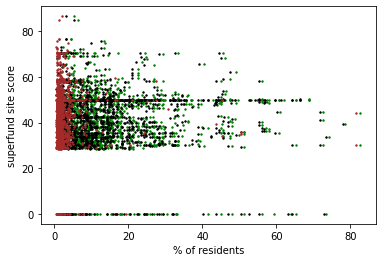

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(superfund_and_nodrop['nonBI'], superfund_and_nodrop['Site Score'], c='green', s=2, label="non Black or Indigenious")
plt.scatter(superfund_and_nodrop['BAC_PER'], superfund_and_nodrop['Site Score'], c='black', s=2, label="Black")
plt.scatter(superfund_and_nodrop['IAC_PER'], superfund_and_nodrop['Site Score'], c='brown', s=2, label="Indigenious")
plt.xlabel("% of residents")
plt.ylabel("superfund site score")
plt.figure()
plt.show()